# Writing A Data Science Blog Post
## 

### By: David Herr
### Dated: August 2nd, 2020

A Jupyter notebook aimed to complete the Udacity Data Science Nanodegree Project 1. In the project, students are to use the CRISP-DM process to understand, prepare, model, and evaluate data to answer real-world business questions.

First, we'll bring in the packages used to complete the project.

In [177]:
# data import and manipulation 
import numpy as np
import pandas as pd

# plotting and graphing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# text analysis, mining, and sentiment
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dlher\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dlher\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dlher\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### 1) Pick A Dataset

Although the traditional CRISP-DM path is to start with business questions, the Udacity Data Science program provided datasets to start with. Thus, we'll start with those datasets and read them in to the notebook.

In [178]:
# Read in Boston dataset
df_boston = pd.read_csv('./_data/listings_boston.csv')

df_boston.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [179]:
# Read in Seattle dataset
df_seattle = pd.read_csv('./_data/listings_seattle.csv')

df_seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


### 2) Pose 3-5 Business Questions
Leveraging this data, we are curious to find out if:

    1. Bedroom or Bathroom count generally correlates to higher pricing?
    2. Are there certain neighborhoods which command generally higher pricing?
    3. Does containing a top N keyword in descriptions result in higher pricing?
    4. Are ratings predictive of pricing?

In [180]:
#### 3) Use CRISP_DM 
To answer these questions, we'll use what is known as the CRISP_DM process. This process is pictated below:

![Image of CRISP_DM](_img\CRISP_DM.png)


SyntaxError: invalid syntax (<ipython-input-180-e1c5fbd009e0>, line 2)

##### 3.1) Business Understanding



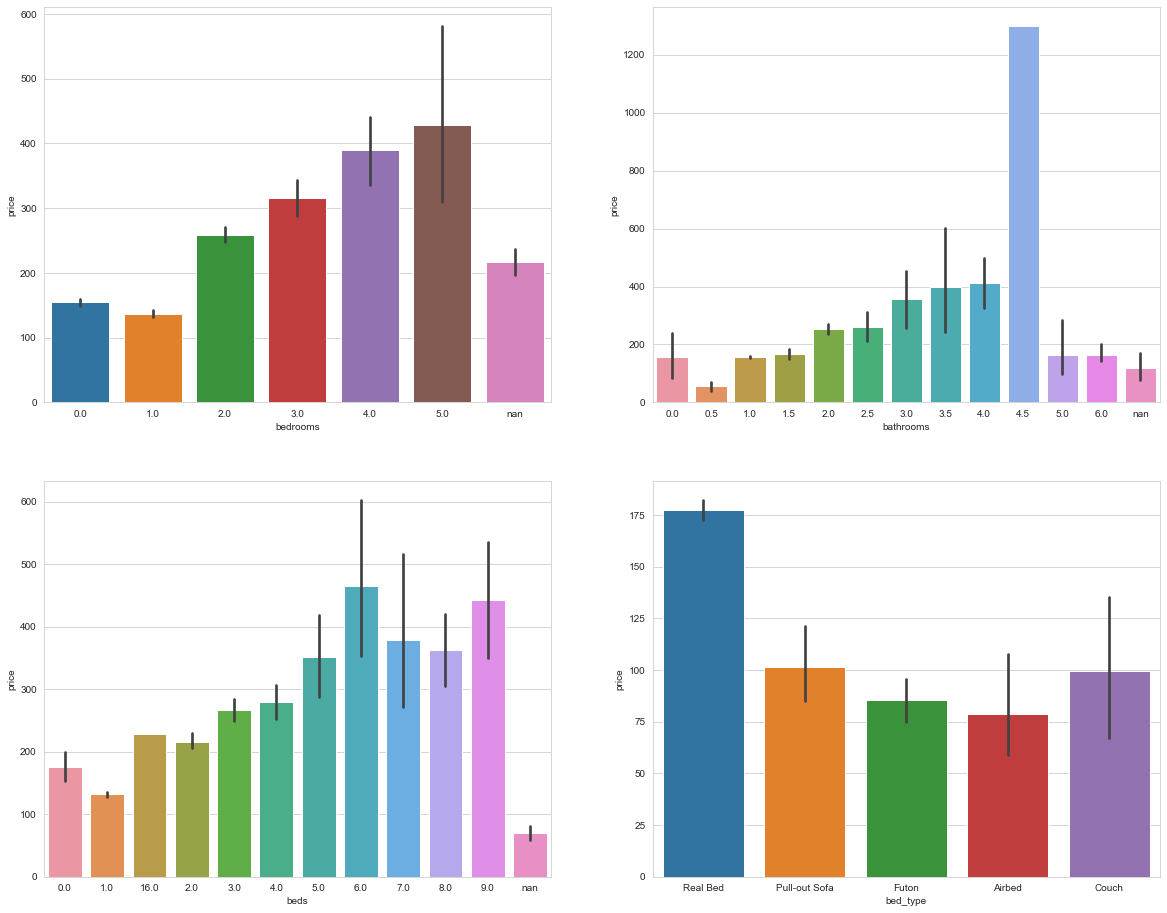

In [165]:
# Pricing must be cleaned as the column contains strings, floats, and ints.
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

def price_analysis_plots(dataframe, is_vertical = True):

    # Clean the pricing column for strings and integer variations
    dataframe['price'] = dataframe['price'].apply(clean_currency).astype('float')

    # Select all x variables in dataframe
    x_variables =  dataframe.columns[dataframe.columns != 'price']

    # Ensure all x variables are of string datatype
    # Not totally robust, but provides simple compatibility with seaborn barplot() function
    dataframe[x_variables] = dataframe[x_variables].astype('str')
    
    # How many categorical variables are there to plot?
    x_count = len(x_variables)

    # Set up a plot based on number of categorical variables
    plt_rows = x_count // 2 + x_count % 2

    if x_count > 1:
        plt_cols = 2
    else:
        plt_cols = 1
    
    plt.figure(figsize = [5 * x_count, 16])

    # Loop through variables to add to figure. 
    for index, variable in enumerate(x_variables):
        plt.subplot(plt_rows, plt_cols,index + 1)
        
        # If horizontal requested, set-up fariable to flip chart horizontal
        if is_vertical:
            bar_orientation = 'v'
            sns.barplot(x=variable,y='price',data=dataframe,orient=bar_orientation)
        else:
            bar_orientation = 'h'
            sns.barplot(x='price',y=variable,data=dataframe,orient=bar_orientation)

#define dataframes to plot against price
boston_bed_bath_bar = df_boston[['price','bedrooms','bathrooms','beds','bed_type']]

# Invoke function
price_analysis_plots(boston_bed_bath_bar)

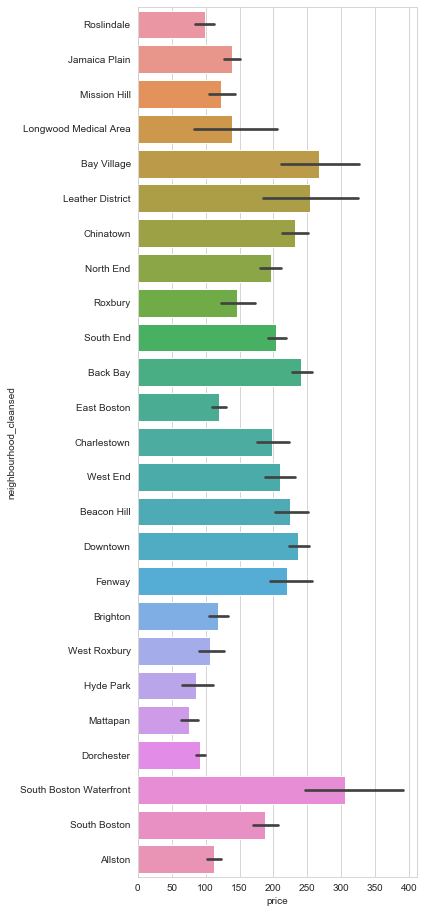

In [166]:
# Set-up price for neighborhoods
neighborhood_bar = df_boston[['price','neighbourhood_cleansed']]

price_analysis_plots(neighborhood_bar, False)

##### 3.2) Data Understanding

While the head() method is useful, a more thorough understanding of all the available columns, datatypes, as well as profile of that data, is necessary before moving on to preparing the data for modeling.

In [38]:
# To be able to understand both datesets quickly, let's put them into a list
df_list = [df_boston,df_seattle]

# And see the overall shape of each data frame, column names, and column data types
for dataframe in df_list:
    print("Dataframe Shape:{}".format(dataframe.shape))
    for col in dataframe:
        print("{}:{}".format(col,dataframe[col].dtypes))

Dataframe Shape:(3585, 95)
id:int64
listing_url:object
scrape_id:int64
last_scraped:object
name:object
summary:object
space:object
description:object
experiences_offered:object
neighborhood_overview:object
notes:object
transit:object
access:object
interaction:object
house_rules:object
thumbnail_url:object
medium_url:object
picture_url:object
xl_picture_url:object
host_id:int64
host_url:object
host_name:object
host_since:object
host_location:object
host_about:object
host_response_time:object
host_response_rate:object
host_acceptance_rate:object
host_is_superhost:object
host_thumbnail_url:object
host_picture_url:object
host_neighbourhood:object
host_listings_count:int64
host_total_listings_count:int64
host_verifications:object
host_has_profile_pic:object
host_identity_verified:object
street:object
neighbourhood:object
neighbourhood_cleansed:object
neighbourhood_group_cleansed:float64
city:object
state:object
zipcode:object
market:object
smart_location:object
country_code:object
country:o

##### 3.3) Data Preperation
In this section, we will be using our above observations to guide both the initial cleansing of our data, as well as initial transformations for feature creation.

**Column Cleansing**
***

We'll start with the data cleansing process on the columns. This will largely involve removing:

- [x]  100% empty
- [x]  Columns with 100% of the same value
- [x]  Database identifications
- [x]  Non-overlapping columns

In [39]:
# Start with dropping columns in all data sets that are 100% na
for dataframe in df_list:
    dataframe.dropna(axis = 1, how = 'all',inplace = True)

In [40]:
# Remove the unnecssary id, url, and scraping columns
def drop_ident_columns(dataframe_list,word_list):
    for dataframe in dataframe_list:
        for word in word_list:
            drop_columns = [col for col in dataframe.columns if col.endswith(word)]
            dataframe.drop(drop_columns, axis = 1,inplace = True)

# Define search words to drop common identification column suffixes
search_words = ['_id','_url','_scraped']

# Invoke function to drop id, url, and scraping columns
drop_ident_columns(df_list,search_words)

In [41]:
# Remove columns where all values are the same (equivalant of 100% empty)
def drop_same_columns(dataframe_list):
    for dataframe in dataframe_list:
        nunique = dataframe.apply(pd.Series.nunique)
        drop_columns = nunique[nunique ==1].index
        dataframe.drop(drop_columns, axis = 1,inplace = True)

# Invoke function to drop any columns containing rows with 100% the same data point
drop_same_columns(df_list)

In [42]:
# Drop columns which do not overlap between the two datasets
def drop_nonoverlap_columns(df1,df2):
    # Find overlapping/instersecting columns between the two datasets
    intersecting_columns = set(df1.columns) & set(df2.columns)

    # Assign each dataset it's own drop columns based off the complete list of intersections
    for dataframe in df1, df2:
        drop_columns = set(dataframe.columns) - intersecting_columns
        dataframe.drop(drop_columns, axis = 1, inplace = True)

# Invoke function to drop non-overlapping columns between two datasets    
drop_nonoverlap_columns(df_boston,df_seattle)

# Check to make sure all columns are overlapping between dataframes
sum((df_boston.columns == df_seattle.columns)) / ((len(df_boston.columns) + len(df_seattle.columns)) / 2 ) == 1

True

**Row & Data Cleansing**
***
Next, we'll move into basic *row cleansing* for items we know will break a linear regression model. This includes:

- [x]  True/False - transform to a true boolean rather than text "t" or "f".
- [x]  Substantial Text - must be transformed into a text analytics feature.
- [ ]  Date Columns - drop or transform into a duration if business questions warrant.

In [43]:
# Function to clean t/f columns to true Booleans
def cleanse_data_tf_to_boolean(dataframe_list):

    for dataframe in dataframe_list:

        column_list = []

        for col in dataframe.columns:
            if sum(dataframe[col].isin(['t','f'])) == len(dataframe[col]):
                column_list.append(col)

        for col in column_list:
            dataframe.loc[(dataframe[col] == 't'),col] = True
            dataframe.loc[(dataframe[col] == 'f'),col] = False

# Invoke function to change 't' or 'f' to true Boolean values
cleanse_data_tf_to_boolean(df_list)

In [182]:
#  Define text columns which require processing for text analytics
text_cols = ['name','summary','space','description','neighborhood_overview', 'notes']

# Begin text mining by defining stop words and lemmatizer dictionary
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

# Function to perform basic tokenization of text columns
def tokenize(text):
    # normalize case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    
    # tokenize text
    tokens = word_tokenize(text)
    
    # lemmatize andremove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return tokens

# Loop through dataframes and text cols to tokenize
def tokenize_text_cols(dataframe_list):

    for dataframe in dataframe_list:
        for col in text_cols:
            colname = col + '_tokenized'
            dataframe[colname] = dataframe[col].apply(str).apply(tokenize)

# Invoke tokenization as add columns in both dataframes
tokenize_text_cols(df_list)

In [229]:
# initialize count vectorizer object
vect = CountVectorizer(tokenizer=tokenize)

# get counts of each token (word) in text data
X = vect.fit_transform(df_seattle['notes'].apply(str).tolist())

# convert sparse matrix to numpy array to view
X.toarray()

# view token vocabulary and counts
top_vocabulary = vect.vocabulary_

from operator import itemgetter
from heapq import nlargest

def get_top_words(data, n=20, order=False):
    """Get top words by frequency. 

    Returns a dictionary or an `OrderedDict` if `order` is true.
    """ 
    top = sorted(data.items(), key=lambda x: x[1], reverse=True)[:n]
    if order:
        return OrderedDict(top)
    return dict(top)

top_vocabulary

# nlargest(20, top_vocabulary, key = top_vocabulary.get)

{'nan': 3309,
 'free': 2143,
 'pillow': 3721,
 'home': 2492,
 'renovated': 4134,
 'restored': 4195,
 'health': 2424,
 'safety': 4296,
 'mind': 3198,
 'especially': 1855,
 'elimination': 1789,
 'reduction': 4069,
 'indoor': 2623,
 'allergen': 415,
 'toxin': 5108,
 'pollutant': 3787,
 'reason': 4029,
 'carpet': 986,
 'hardwood': 2399,
 'slate': 4560,
 'floor': 2071,
 'radiant': 3980,
 'heat': 2431,
 'tend': 4967,
 'house': 2532,
 'lot': 2994,
 'time': 5046,
 'even': 1874,
 'used': 5298,
 'single': 4529,
 'owner': 3556,
 'statistic': 4744,
 'make': 3060,
 'many': 3081,
 'people': 3658,
 'feel': 1995,
 'pretty': 3855,
 'queasy': 3955,
 'essentially': 1859,
 'become': 703,
 'great': 2306,
 'breeding': 854,
 'ground': 2329,
 'bacteria': 633,
 'dust': 1720,
 'mite': 3224,
 'mention': 3151,
 'drool': 1697,
 'hair': 2360,
 'oil': 3465,
 'perspiration': 3686,
 'since': 4528,
 'sweat': 4885,
 'pint': 3730,
 'night': 3366,
 'also': 437,
 'easily': 1740,
 'trap': 5138,
 'mildew': 3192,
 'mold': 323

##### 3.4) Data Modeling

[Outline placeholder for data modeling section]

##### 3.5) Results Evaluation

[Outline placeholder for evaluation of model and possible re-modeling]

##### 3.6) Deployment

[Outline placeholder for what deployment steps would be]

#### 4. Conclusion

[Outline placeholder for final remarks]